# Machine Learning: A Primer for Radiologists

## Contents

* Machine Learning Basics
* Machine Learning Workflow
* Commonly Used Models
* Applications in Radiology
* Notes and Tips


### Machine Learning Basics
* Supervised and Unsupervised Learning
* Supervised Learning Through Gradient Descent
* Model Specification, Training, and Testing

#### Unsupervised and Supervised Learning

| Unsupervised | Supervised |
| :-------------: | :-------------:|
| Aims to "summarize" data  | Aims to "learn" a function or parameters of a function as a map between input data and output/prediction |
| Methods to reduce dimensionality of data | Methods to train a system for prediction |
| Clustering, Compression, Association Rules | Regression |

#### Supervised Learning - Example

<table>
  <tr>
    <td> Classification by nearest neighbor voting - this models "learns" from a set of labeled data, based on how close a particular point in space is to other labeled points. </td>
    <th rowspan="2" style="width:40%"><img src="assets/images/knn_regression.png" alt='knn_regression'></th>
  </tr>
  <tr>
    <td> A function of 2-dimensional input space is "learned" based on the majority voting of the 15 nearest neighbors in the dataset. <p> $$F(x_{1}, x_{2}) = \frac{1}{k} \sum_{x_{i} \in N_{k}(k)} y_{i}$$ </p> </td>
  </tr>
</table>


<footer id="attribution" style="float:left; color:#999; background:#fff;">
<p>Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013. Chapter 2, Page 7</p>
</footer>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

In [193]:
x1 = np.random.normal(loc=1.0, scale=0.5, size=(1000,))
x2 =  x1  + np.random.normal(loc=3.0, scale=0.7, size=(1000,))

X_pca = pd.DataFrame([x1,
                      x2]) 

In [194]:
X_pca = X_pca.transpose()

In [196]:
pca = PCA()

In [197]:
pca.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

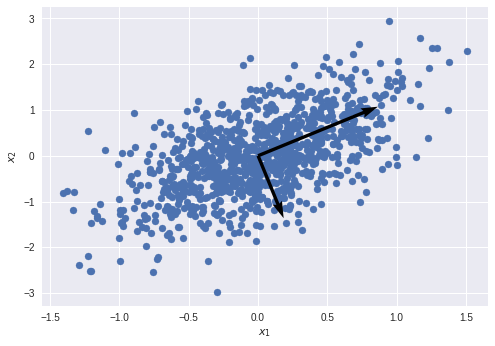

In [277]:
fig=plt.figure()
plt.scatter(x1- pca.mean_[0],x2-pca.mean_[1])
X, Y = zip(*pca.components_.transpose())
# X = np.array(X)
# Y = np.array(Y)
# X += pca.mean_
# Y += pca.mean_

ax = plt.gca()
ax.quiver([0,0], [0,0], X,Y, scale=1, scale_units='xy')
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')

plt.show()
fig.savefig('assets/images/pca.png')

#### Unsupervised Learning - Example

<table>
  <tr>
    <td> Principal Component Analysis (PCA) - a technique that finds a linearly independent set of features that best describe the variance of the input dataset </td>
    <th rowspan="2" style="width:60%"><img src="assets/images/pca.png" alt='pca' style="width:600px;"></th>
  </tr>
  <tr>
    <td> Often used to reduce the dimensionality of a dataset to a small number of features with the best "signal", as the new features found by PCA will best explain the variance within the dataset. </td>
  </tr>
</table>


#### Unsupervised and Supervised Learning
<table>
  <tr>
    <td>These methods are not exclusive of each other and can compliment each other!</td>
    <th rowspan="2" style="width:55%"><img src="assets/images/gene_expression_regression.jpg" alt='gene_express'></th>
  </tr>
  <tr>
    <td>Example: reducing the dimensionality of gene expression data to summarize the most important gene expression patterns of a dataset (unsupervised), which is then used to estimate survival (supervised).</td>
  </tr>
</table>


<footer id="attribution" style="float:left; color:#999; background:#fff;">
<p>Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013. Chapter 16 Page 29</p>
</footer>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

x = np.linspace(0, 500.0, num=50)
x += abs(x.min()) + 1.0
y = np.log(x) + np.random.normal(scale=0.25,size=(x.size,))

p_lin = np.polyfit(x, y, 1)
p_high = np.polyfit(x, y, 32)
p_lin_y = np.polyval(p_lin, x)
p_high_y = np.polyval(p_high, x)

/home/matt/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: RankWarning: Polyfit may be poorly conditioned


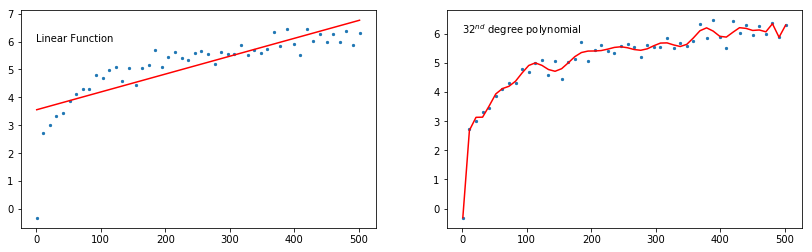

In [2]:
fig = plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(x, y, s=5)
plt.text(0.05, 6.0, 'Linear Function')
plt.plot(x, p_lin_y, color='r')

plt.subplot(122)
plt.scatter(x, y, s=5)
plt.plot(x, p_high_y, color='r')
plt.text(0.05, 6.0 , '$32^{ nd }$ degree polynomial')
fig.savefig(os.path.join('assets', 'images', 'bias_var.png'), bbox_inches='tight')
plt.show()

In [3]:
def cost(predictions, ground_truth):
    total_cost = 0.0
    for i in range(len(predictions)):
        total_cost += (1.0 / 2.0) * (predictions[i] - ground_truth[i])**2.0
    
    total_cost /= float(len(predictions))
    return total_cost
    

def hypothesis_function(m, x, b):
    h = m * x + b
    return h

def gradients(m, b, x, ground_truth):
    m_gradient = 0.0
    b_gradient = 0.0
    
    predictions = []
    
    for i in range(len(x)):
        predictions.append(hypothesis_function(m, x[i], b))
    
    for i in range(len(x)):
        error = predictions[i] - ground_truth[i]
        m_gradient += error * x[i]
        b_gradient += error * 1.0
        
    m_gradient /= float(len(x))
    b_gradient /= float(len(x))
    
    return m_gradient, b_gradient

def update_parameters(m, b, m_gradient, b_gradient, alpha):
    m_updated = m - (m_gradient * alpha)
    b_updated = b - (b_gradient * alpha)
    
    return m_updated, b_updated


def run_gradient_descent(x, y, m_init, b_init, alpha=0.01, num_iteration=1500, tol=1e-4):
    
    m = m_init
    b = b_init
    
    m_vals = []
    b_vals = []
    costs = []
    
    for iteration_num in range(num_iteration):
        #save the current values of m and b
        m_vals.append(m)
        b_vals.append(b)
        
        #make our predictions
        predictions = []
        for i in range(len(x)):
            predictions.append(hypothesis_function(m, x[i], b))
        
        #compute the cost and save it
        current_cost = cost(predictions, y)
        costs.append(current_cost)
        
        if current_cost < tol: #check if we are done
            break
        else: 
            #compute the gradients
            m_grad, b_grad = gradients(m, b, x, y)
        
            #update parameters m and b
            m_new, b_new = update_parameters(m, b, m_grad, b_grad, alpha)
 
            #reset m and b
            m = m_new
            b = b_new
            
    return m_vals, b_vals, costs
        
        
    

#### Supervised Learning Through Gradient Descent

* Core concept in ML
* Main idea:
    1. Specify a model
    2. Make an initial guess at the model parameters
    3. Measure the error associated with the current model parameters
    4. Adjust model parameters to reduce error on the next round of prediction
    5. Repeat steps 1-4 until the error is minimized over a model and datas set

#### Supervised Learning Through Gradient Descent
* Pieces of machinery that are needed:
    1. A method for measuring the error associated with our guesses
    2. A method to adjust the model parameters so that future predictions are better

* A few definitions

$$
X := \text{input data, which is a set of examples such that } x^{(i)} \in X \text{ for } i=1 .. N
\\
Y := \text{output data, or what we are trying to predict such that } y^{(i)} \in Y \text{ for } i=1..N
\\
\Theta := \text{model parameters (unspecified before training)}
\\
M(X, \Theta) := \text{the model, which takes } X \text{ and } \Theta \text{ as input to attempt to predict the output }Y
\\
J(M(X, \Theta), Y) := \text{the error or "cost" function, which compares model prediction to desired output}
$$

#### Supervised Learning Through Gradient Descent
A common choice for the cost function is the squared difference function

$$ 
\begin{align}
\\
J(M(X, \Theta), Y) & =  \frac{1}{2N} \sum_{i=1}^{N} (M(x^{(i)}, \Theta) - y^{(i)})^{2} &
\\
\end{align}
$$

#### Supervised Learning Through Gradient Descent
One reason is because this function, when taking the derivative with respect to $\Theta$ has a simple form:

$$\frac{\partial J}{\partial \Theta} = \frac{1}{N}\sum_{i=1}^{N} (M(x^{(i)}, \Theta) - y^{(i)})^{2} \frac{\partial M}{\partial \Theta} $$

#### Supervised Learning Through Gradient Descent
* We still need a method for updating the model parameters to reduce the error on future iterations
* The crux of the idea of Gradient Descent is to use the derivative of the cost function to "nudge" the parameters $\Theta$ in the right direction
* This is typically done by measuring the gradient and then multiplying the gradient by some small value $\alpha$, and subtracting it from the current value of $\Theta$

$$\Theta_{j+1} = \Theta_{j} - \alpha \frac{\partial J}{\partial \Theta}$$
<center>where $\Theta_{j}$ is the value of $\Theta$ on the $j^{\text{th}}$ iteration of the algorithm</center>


#### Supervised Learning Through Gradient Descent
* Let's walk through a concrete example
* Let's use gradient descent with a linear model

#### Supervised Learning Through Gradient Descent
* One of the most well known cases - linear regression
* Task is to "learn" the values of a linear model that best fits the data

<br>
<br>
 <center> $$ Y = mx + b $$ </center>
<br>
<br>

* Our goal here is to estimate what values of $m$ and $b$ best fit the data

* Therefore the model function looks like this
$$M(X, m, b) = mX + b$$

* And the cost function has this form:
$$J(M(X,m,b), Y) = \frac{1}{2N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$

and

$$\frac{\partial J}{\partial m} = \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2} x^{(i)} $$

and


$$\\ \frac{\partial J}{\partial b} = \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$

So the update rules for our parameters becomes:

$$m_{j+1} = m_{j} - \alpha \frac{1}{N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2} x^{(i)}$$


and


$$b_{j+1+} = b_{j} - \alpha \frac{1}{N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$

#### Supervised Learning Through Gradient Descent

Cost function equation:

$$J(M(X,m,b), Y) = \frac{1}{2N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$


Cost function code:

```python
    def cost(predictions, ground_truth):
        total_cost = 0.0
        for i in range(len(predictions)):
            total_cost += (1.0 / 2.0) * (predictions[i] - ground_truth[i])**2.0

        total_cost /= float(len(predictions))
        return total_cost
```

#### Supervised Learning Through Gradient Descent

Model Equation:

$$M(X, m, b) = mX + b$$

Model Code:

```python
def hypothesis_function(m, x, b):
    h = m * x + b
    return h

```

#### Supervised Learning Through Gradient Descent

Gradient Equation:

$$J(M(X,m,b), Y) = \frac{1}{2N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$

Gradient Code:

```python
def gradients(m, b, x, ground_truth):
    m_gradient = 0.0
    b_gradient = 0.0
    predictions = []
    for i in range(len(x)):
        predictions.append(hypothesis_function(m, x[i], b))
    
    for i in range(len(x)):
        error = predictions[i] - ground_truth[i]
        m_gradient += error * x[i]
        b_gradient += error * 1.0
        
    m_gradient /= float(len(x))
    b_gradient /= float(len(x))
    return m_gradient, b_gradient
```

#### Supervised Learning Through Gradient Descent
Parameter update equations:

$$m_{j+1} = m_{j} - \alpha \frac{1}{N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2} x^{(i)}$$


and


$$b_{j+1+} = b_{j} - \alpha \frac{1}{N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$

Parameter update code:

```python
def update_parameters(m, b, m_gradient, b_gradient, alpha):
    m_updated = m - (m_gradient * alpha)
    b_updated = b - (b_gradient * alpha)
    
    return m_updated, b_updated
```

#### Supervised Learning Through Gradient Descent
```python
def run_gradient_descent(x, y, m_init, b_init, alpha=0.01, num_iteration=1500, tol=1e-4):
    m = m_init
    b = b_init
    m_vals = []
    b_vals = []
    costs = []
    
```

```python
    for iteration_num in range(num_iteration):
        #save the current values of m and b
        m_vals.append(m)
        b_vals.append(b)
        #make our predictions
        predictions = []
        for i in range(len(x)):
            predictions.append(hypothesis_function(m, x[i], b))
        #compute the cost and save it
        current_cost = cost(predictions, y)
        costs.append(current_cost)
        if current_cost < tol: #check if we are done
            break
        else: 
            #compute the gradients
            m_grad, b_grad = gradients(m, b, x, y)
            #update parameters m and b
            m_new, b_new = update_parameters(m, b, m_grad, b_grad, alpha)
            #reset m and b
            m = m_new
            b = b_new
    return m_vals, b_vals, costs
```

#### Supervised Learning Through Gradient Descent
* Lets see it in action!


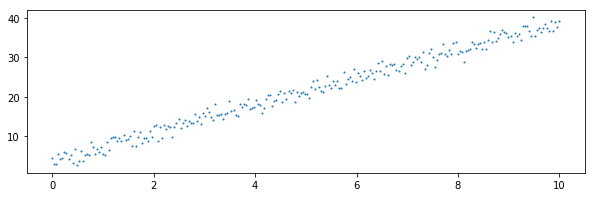

In [4]:
m_true = 3.5
b_true = 4.0
x = np.linspace(0, 10.0, num=250)
y = x * m_true + b_true + np.random.normal(scale=1.3,size=(x.size,))
fig = plt.figure(figsize=(10, 3))
plt.scatter(x, y,s=1.0)
plt.show()

In [5]:
mv, bv, c = run_gradient_descent(x, y, -2.0, 30.0, num_iteration=5000) #initalizes m=-2.0 and b=30.0

In [6]:

import plotly

idxs = range(0,len(mv), 500)

# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [0, 10], 'title': 'X'}
figure['layout']['yaxis'] = {'range':[0,45], 'title': 'Y'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 800
        }
    ],
    'plotlycommand': 'animate',
    'values': idxs,
    'visible': True
}
figure['layout']['width'] = '700'

figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 800, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 800}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': -1,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': '',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 800},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}




for idx in [idxs[0]]:
    y_hat = mv[idx] * x + bv[idx]
    
    data_dict = {'x':x,
                 'y':y_hat,
                 'name':'Model',
                 'line':dict(width=4)}
    
    figure['data'].append(data_dict)
    
figure['data'].append({'x':x, 'y':y,'mode':'markers','name':"Data",'marker':dict(color='green')})

    
#make frames
for idx in idxs:
    frame = {'data': [], 'name': str(idx)}
    
    y_hat = mv[idx] * x + bv[idx]
    
    data_dict = {'x':x,
                 'y':y_hat}
    
    frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [idx],
        {'frame': {'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 800}}
     ],
     'label': 'Iteration: {i} | {cmv:.2f}x + {cbv:.2f}'.format(cmv=mv[idx], cbv=bv[idx], i=idx),
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]




In [7]:
plotly.offline.init_notebook_mode(connected=True)

In [8]:
plotly.offline.iplot(figure, show_link=False)

In [9]:
m_final = mv[-1]
b_final = bv[-1]

#### Supervised Learning Through Gradient Descent
* Based on the code, it looks like we got $m=3.50$ and $b=3.94$
* Not too shabby!
* This idea can be applied to any model function $M$ (as long as it has a continuous, well defined derivative)
* We used a linear function here, but it could be anything

### Machine Learning Workflow
* Typical approach to using machine learning
    1. Identify problem, data source
    2. Feature extraction and dataset compilation
    3. Model selection and training
    4. Model testing

### Machine Learning Workflow - Problem Identification
* Sounds simple, often most challenging
* A few questions to ask:
    1. What is my goal? 
    2. What "output" do I want the system to produce?
    3. What do I want to predict? 
    4. What data do I have to make such a prediction? Is it logical to use the data I have to make the prediction?


### Machine Learning Workflow - Feature Extraction
* Raw data typically not suitable for prediction
* All models require a fixed number of input parameters (some exceptions to this using kernels)
* Intermediate processing steps to reliably measure features from raw data
    * Manual extraction of features
    * SIFT features from images
    * Term Frequency - Document Inverse Frequency (TF-IDF) vectors from text data
    
    
* Features from each sample are compiled into a table
* Automation is ideal but **not** necessary!

### Machine Learning Workflow - Feature Extraction

Example from our recent [AHA poster](https://aha.apprisor.org/epsView.cfm?y4IQEr57sqsVQGWpLxb9XXbq6itE%2FzVu6GolXdn34Ln8nE%2FYsSsz9A%3D%3D)

![simp_man](assets/images/simplified_extraction.jpg)

### Machine Learning Workflow - Feature Extraction
SIFT Features from images - used to construct a "fingerprint" for objects in images. See [this github repository for some examples](https://github.com/themantalope/bag-of-visual-words-example)
<p float="left">
    <img src="assets/images/owl.jpg" width="50%" align="left"/>
    <img src="assets/images/toad.jpg" width="50%" align="left"/>
</p>


In [10]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
type(X_train_tf.todense())

numpy.matrixlib.defmatrix.matrix

In [15]:
X_pd = pd.DataFrame(X_train_tf.todense())

In [16]:
desc = X_pd.describe()

In [17]:
desc.loc[:, 0:10]

,0,1,2,3,4,5,6,7,8,9,10
count,2257.000000,2257.000000,2257.000000,2257.000000,2.257000e+03,2257.000000,2257.000000,2257.000000,2257.000000,2.257000e+03,2257.000000
mean,0.001606,0.001003,0.000002,0.000057,8.470387e-07,0.000040,0.000038,0.000031,0.000016,9.015170e-07,0.000002
std,0.009588,0.014123,0.000086,0.001918,4.024102e-05,0.001156,0.001792,0.001459,0.000773,4.282917e-05,0.000080
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
max,0.146211,0.505964,0.004075,0.065233,1.911766e-03,0.043073,0.085126,0.069338,0.036711,2.034724e-03,0.003824


In [18]:
desc.loc['iqr', :] = desc.loc['75%', :].values - desc.loc['25%', :]

In [19]:
z = desc.loc['std', :].sort_values(ascending=False)

In [20]:
z2 = desc.loc['iqr', :].sort_values(ascending=False)

In [21]:
good_cols = z2.iloc[0:50].index.tolist()

In [22]:
colors_dict = dict(zip(set(twenty_train.target), sns.color_palette(palette='deep', n_colors=len(set(twenty_train.target)))))

In [23]:
colors_dict

{0: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 1: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 2: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 3: (0.5058823529411764, 0.4470588235294118, 0.6980392156862745)}

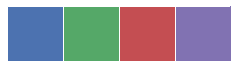

In [24]:
sns.palplot(sns.color_palette('deep', 4))
plt.show()

In [25]:
r_colors = [colors_dict[y] for y in twenty_train.target]

In [26]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [27]:
names_dict = {0:'Atheism', 1:'Graphics', 2:'Medicine', 3:'Christianity'}
names_to_colors = dict(zip(names_dict.values(), colors_dict.values()))

In [28]:
names_to_colors

{'Atheism': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 'Christianity': (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 'Graphics': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 'Medicine': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)}

/home/matt/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



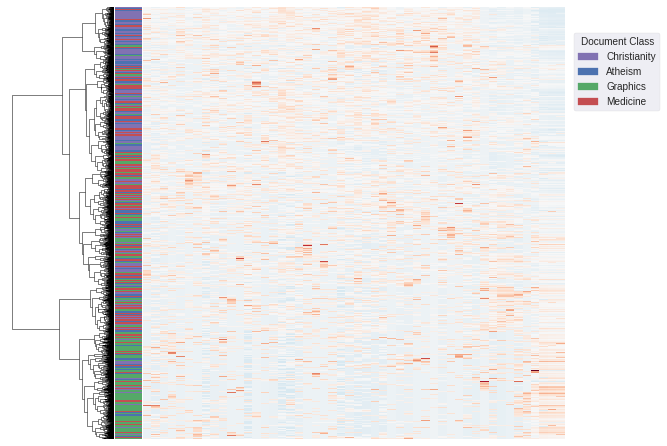

In [29]:
import sys
import matplotlib.patches as mpatches
sys.setrecursionlimit(40000)

g=sns.clustermap(X_pd.loc[:,good_cols], 
               yticklabels=False, 
               xticklabels=False,
               col_cluster=True,
               row_cluster=True,
               method='ward',
               z_score=1,
               row_colors=r_colors)

g.ax_col_dendrogram.set_visible(False)
g.cax.set_visible(False)



legend_TN = [mpatches.Patch(color=c, label=l) for l,c in names_to_colors.items()]

l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
l2.set_title(title='Document Class',prop={'size':10})


plt.show()

### Machine Learning Workflow - Feature Extraction
TF-IDF features and clustering of news documents, used to get a unique signal for each document based on the words contained within it. Documents with similar words tend to cluster together.
![tfidf](assets/images/tfidf_cluster.png)

### Machine Learning Workflow - Feature Extraction
* These are a few examples of how to collect features from various datsets.
* With robust and reliable feature extraction, features can then be used in a number of downstream applications
* Features can be used for either supervised or unsupervised learning.


### Machine Learning Workflow - Model Selection and Training
* Many models are available
* Important questions to ask:
    1. How much do I care about predictive accuracy?
    2. Do I care if the model parameters are interpretable?
    3. How much data do I have available for training?
    4. Underfitting and overfitting

### Machine Learning Workflow - Model Selection and Training
How much do I care about predictive accuracy?
- Simpler models make more assumptions about the relationship between input data and output
- May sacrifice accuracy for simplicity
- Example: Linear model vs. neural networks


### Machine Learning Workflow - Model Selection and Training
In the case of a linear function, we are limited by the assumption that our input $X$ is proportionally related to the output $y$ by some value, $m$.


$$y = m X + b$$






However, a neural network can model a much more complex relationship between $X$ and $y$ by taking the input $X$ and passing it through several "layers" of functions:

$$ y = f(f(X;\beta_{0}); \beta_{1})$$

Therefore, you may get better predictions with a neural network, as it makes fewer assumptions about how $X$ and $y$ are related.

### Machine Learning Workflow - Model Selection and Training

<img src="assets/images/murphy_probability_mass.png" style="width:600px;"/>

This figure from Kevin Murphy illustrates the relationship between model complexity (increasing from blue to green) and the complexity of a dataset. More complex models "spread" their ability to model more datasets but are less likely to model any particular dataset well. Models that are too simple (blue) make too many assumptions about the dataset and fail to model many more complex datasets.



<footer id="attribution" style="float:left; color:#999; background:#fff;">
<p>
Murphy KP. Machine Learning, A Probabilistic Perspective. MIT Press; 2012. Page 157
</p>
</footer>

### Machine Learning Workflow - Model Selection and Training
Do I care if the model parameters are interpretable?
* Some models (linear models, in particular Generalized Linear Models or GLMs) are well studied and are frequently used in many fields for interpreting a relationship between two variables
* GLMs have robust literature and statistical tests for comparing model parameters
* Can discuss "statistical significance" of a correlation between input variables (i.e. Wald test in logistic regression models)
* $y = mX + b$ is a GLM that assumes $y$ is a Gaussian distributed random variable
* In this case we have an intuitive explanation of what $m$ is - a parameter that controls how variations in $X$ *proportionally* affect the output $y$
    

### Machine Learning Workflow - Model Selection and Training
Do I care if the model parameters are interpretable?
* However, other newer models are not as well studied but have been shown to be very flexible predictive models
* Models such as Random Forest regression models and neural networks are very flexible and general models (i.e. they can model $f(x) = y$ no matter how complex the relationship between $x$ and $y$ is).
* The problem is that we don't have a good way to interpret the meaning of the $\beta$ values "learned" after model training for a neural network

$$ y = f(f(X;\beta_{0}); \beta_{1})$$

* The bottom line - if you need to make accurate predictions but don't care about model interpretation you should use whatever works best, whether that is a neural network, random forest, support vector machine or a GLM
* If you need to have some kind of understanding of the model parameters or need to report statistical significance of relationships of input and output, use a GLM (logistic regression, Poisson regression, Gaussian etc)


<footer id="attribution" style="float:left; color:#999; background:#fff;">
<p>Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013. Chapters 4, 6, 10 and 15</p>
</footer>

### Machine Learning Workflow - Model selection and training
How much data do I have available for training?
* Big assumption with most machine learning models - your training data "covers" all the variance you expect to encounter in the real world (testing data)
* Therefore if you have a small number of samples available to train on, it is more likely that your model will overfit the training data and make poor predictions with new samples
* Analogous to learning a few examples but not learning the general "rule"


* **General rule of thumb: ** *the more complex your model (i.e. number of parameters, layers etc), and more variables you are going to use (i.e. the number of features used to make predictions) the more samples you need to train a competent model*

### Machine Learning Workflow - Model selection and training
Underfitting and overfitting
* The concepts described above are at the crux of machine learning
* Poor prediction can come from two main sources
    1. Underestimating the complexity between input and output (underfitting)
    2. Overfitting the training data (learning specific examples and not the rule)
* Framed as the bias-variance tradeoff
    1. Models with high "bias" make more assumptions about input features and target output
    2. Models with low "bias" make less assumptions about input features and target output and puts a greater emphasis on relationships in training data to estimate model parameters
    3. While it may seem logical to reach for models with the lowest bias, there is a risk of overfitting training data that may contain noise not relevant to prediction, or the model ends up learning specific examples from training that do not generalize well

### Machine Learning Workflow - Model selection and training
Underfitting and overfitting
* These summarized in this figure 

<img src="assets/images/hastie_bias_var.png" style="width:600px;"/>

<footer id="attribution" style="float:left; color:#999; background:#fff;">
<p>Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013. Chapter 7</p>
</footer>



**Main goal of developing any machine learning model is to use a model that hits the middle of the above figure for your dataset!**

### Commonly Used Models
* This section will go over a few commonly used models
* Discuss model structure
* A few pros and cons of each model
* Many, can be found ready to use with the Python [scikit-learn](http://scikit-learn.org/stable/) package
* Models:
    1. Generalized Linear Models
    2. Decision Trees
    3. Random Forests
    4. Neural Networks

### Commonly Used Models - Generalized Linear Models
* Some of the best studied models
* Idea is to model the target ($y$) as the mean (or expected value, $\mu$) of a member of the family of exponential distribution
* The general form of the model is:


<center> $$E(Y) = \mu = g^{-1}(\beta X)$$ </center>


* Where the function $g$ is called the link function, and is dependent on the type of distribution modeled



### Commonly Used Models - Generalized Linear Models
<table>
  <caption> <center> Generalized Linear Models and Link Functions </center></caption>
  
  <tr>
      <th> Data Type </th>
      <th> Distribution </th>
      <th> Link function </th>
  </tr>
  
  <tr>
      <td> Binary </td>
      <td> Bernoulli </td>
      <td> $\mu = \frac{1}{1+e^{-\beta X}}$ </td>
  </tr>
  
  <tr>
      <td> Linear response </td>
      <td> Gaussian (aka Normal) </td>
      <td> $\mu = \beta X$ (sometimes called the "identity" function) </td>
  </tr>
  
  <tr>
      <td> Count (integer) </td>
      <td> Poisson </td>
      <td> $\mu = e^{\beta X}$ </td>
  </tr>
  
</table>

### Commonly Used Models - Generalized Linear Models
<table>
  <caption> <center> Generalized Linear Models Pros and Cons </center></caption>
  
  <tr>
      <th> Pros </th>
      <th> Cons </th>
  </tr>
  
  <tr>
        <td> The parameters $\beta$ learned from data are interpretable </td>
        <td> Are only capable of modeling simple behaviors in output </td>
  </tr>
  
  <tr>
        <td> Can run statistical tests on the $\beta$ values for significance of correlation </td>
        <td> Typically need a large sample number for good model performance </td>
  </tr>
  
  <tr>
        <td> Available through many open source software packages </td>
        <td> Commonly used optimization algorithms assume $X$ is normally distributed, and get the maximum likelihood estimate of $\beta$ which may not result in optimal predictions for every distribution of $X$! Bayesian estimation of $\beta$ can overcome this, but the software for this use case is not as easy for beginners.</td>
  </tr>
  
  <tr>
      <td> Models can be constrained through regularization to prevent overfitting, or select for strong predictors for datasets with a large number of features. </td>
      <td>  </td>
  </tr>
  
</table>

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import graphviz

iris_data = load_iris()
tree_classifier = DecisionTreeClassifier()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, train_size=0.7)

In [7]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
tree_classifier.score(X_test, y_test)

0.93333333333333335

In [9]:
import sklearn.tree

In [12]:
dot_data_from_tree = sklearn.tree.export_graphviz(tree_classifier, out_file=None, feature_names=iris_data.feature_names)
g = graphviz.Source(dot_data_from_tree)
g.render(filename='iris.png')

'iris.png.pdf'

### Commonly Used Models - Decision Trees
* Decision Trees are one of the simplest models available
* Make binary splits based on values of input features
* Seen throughout medical literature, typically in diagnostic or therapeutic algorithms
* See [this link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) for a fantasic visualization of the training process of decision trees

<footer id="attribution" style="float:left; color:#999; background:#fff;"> <p>Stephanie Lee and Tony Chu. Available at: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/. Accessed November 24, 2017.</p></footer>

### Commonly Used Models - Decision Trees
Decision tree model for classifying types of iris flowers based on sepal width, petal length and petal width
<img src="assets/images/iris.png" style="width:600px;"/> 



### Commonly Used Models - Decision Trees
Code for training and testing the above model:
```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
tree_classifier = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, train_size=0.7)
tree_classifier.fit(X_train, y_train)
tree_classifier.score(X_test, y_test)
Out: 0.93333333333333335
```

### Commonly Used Models - Decision Trees
<table>
  <caption> <center> Decision Trees Pros and Cons </center></caption>
  
  <tr>
      <th> Pros </th>
      <th> Cons </th>
  </tr>
  
  <tr>
        <td> The learned model is very interpretable. </td>
        <td> Have a tendency to severely overfit training data. </td>
  </tr>
  
  <tr>
        <td> Very fast to train, can train large trees with limited computing power. </td>
        <td> May require a complex tree to model all nuance within a dataset, making interpretability difficult.  </td>
  </tr>
  

</table>

### Commonly Used Models - Random Forests
* Problem with one decision tree is that it will overfit the training data
* This can be overcome by "averaging" a large number of trees
* Basic ideas:
    1. Train a large number of trees in parallel
    2. Each tree sees a limited subset of training samples **and** a limited number of features
    3. Model makes ultimate predictions by averaging predictions of all trees
* Analogous to guidelines developed by expert committees - each expert's training and experience is different
* Each expery may have "overfit" their mental model to the data they saw in training
* Debating and communication between committee members "averages" out the differences, resulting in a good model
* Called more generally an "ensemble" model (ensemble of small, weak predictors)

In [17]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, train_size=0.7)

rfc = RandomForestClassifier(n_estimators=100, max_depth=3)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.97777777777777775

### Commonly Used Models - Random Forests
Let's return to the iris data from before and see if a random forest model performs better.

```python
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, train_size=0.7)

rfc = RandomForestClassifier(n_estimators=100, max_depth=3)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
Out: 0.97777777777777775 
```

### Commonly Used Models - Random Forests
<table>
  <caption> <center> Random Forests Pros and Cons </center></caption>
  
  <tr>
      <th> Pros </th>
      <th> Cons </th>
  </tr>
  
  <tr>
        <td> Very powerful models, capable of modeling very complex relationships. </td>
        <td> Final model is not easily interpreted. Can get an estimate of feature importance for prediction based on average reduction in entropy or with Gini index across all trees. </td>
  </tr>
  
  <tr>
        <td> Fast to train, all trees in the forest can be trained in parallel. Excellent for low resource settings. </td>
        <td> No good rules for selecting parameters. Often need to fit a number of models to the dataset, varying forest size and maximum tree depth. May not be able to easily explain why one set of parameters was better/worse. </td>
  </tr>
  

</table>

### Commonly Used Models - Neural Networks
* Modeled after behavior of neurons within brains
* Idea is to pass output from one layer of neurons to another and so forth
* Connections between neurons are modeled by weights between neurons
* During training, weights are weakened and strengthened to improve model prediction
* Popular with recent developments in computational power of graphical processing units (GPUs)
    * GPUs are capable to carrying out large matrix calculations quickly, which are a core part of network computation
    * Speed at which large networks can be trained has been reduced
    * Networks with many layers (referred to as "deep" networks) are now feasible to train for many problems


### Commonly Used Models - Neural Networks
Core idea behind model is a nested function with "weights" between layers:

$$y = f(\beta_{n}... ,f(\beta_{2},f( \beta_{1},f(\beta_{0},X))))$$

Where the function $f$ is (classically) a well defined function with a continuous derivative. 

The first neural networks modeled the activation functions neurons (on/off behavior) using the sigmoid function.

$$f(X, \beta) = \frac{1}{1+e^{-X\beta}}$$

In [1]:
import math
def sigmoid(x, beta):
    return 1./(1.0 + math.exp(-beta * x))

In [2]:
import matplotlib.pyplot

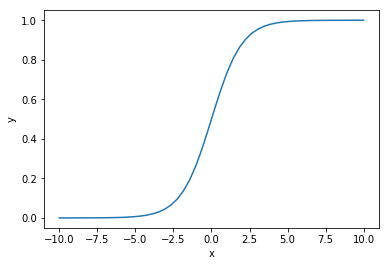

In [7]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-10.0, 10.0)
yy = np.array([sigmoid(i, 1.0) for i in xx])

fig = plt.figure()
plt.plot(xx, yy)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
fig.savefig('assets/images/sigmoid.png')

### Commonly Used Models - Neural Networks
* Another way to think about this model - it's a nested set of GLMs. 
* Allows the GLM to overcome limitations in the complexity of the function it can model
* [Tensorflow (Google's open-source deep learning library) neural network playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.09844&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
<p float="left">
    <img src="assets/images/sigmoid.png" align="left" width="50%"/>
    <img src="assets/images/NN_diagram.png" align="left" width="50%"/>
</p>

<footer id="attribution" style="float:left; color:#999; background:#fff;">
<p>Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013. Chapter 10 Page 5</p>
</footer>

### Commonly Used Models - Neural Networks
<table>
  <caption> <center> Neural Networks Pros and Cons </center></caption>
  
  <tr>
      <th> Pros </th>
      <th> Cons </th>
  </tr>
  
  <tr>
        <td> Very powerful models, capable of modeling very complex relationships. </td>
        <td> Final model is not easily interpreted. Can get a sense of what features are learned at various layers of the network by looking at weights, but cannot test for significance of patterns. </td>
  </tr>
  
  <tr>
        <td> Can be used with many different types of data, can be used with images, text, tabular data etc. </td>
        <td> Notoriously finnicky to train, takes a long time to train due to diminishing error gradient as error signal is "backpropagated" through network (it can take a long time to optimize model weights) </td>
  </tr>
  
  <tr>
      <td> Given the flexibility and predictive power, huge research interest, lots of active development. </td>
      <td> Still poorly understood, although progress on better theoretical understanding is being made. Some refer to the current period as analogous to "engineering before Newtonian physics". We are exploring how to build and use neural networks, but don't understand all the details and can't predict behavior. </td>
  </tr>
  

</table>

### Applications in Radiology
* Wide range of developing applications
* Huge amount of labeled data - a precious resource for developing models
* Already shown promise in development of automated disease classification

<figure>
    <img src="assets/images/lakhani_deep_TB.png" align="center" width="300px"/>
    <figcaption> An image from Lakhani et. al showing the areas of an image that activate a deep CNN for detecting tuberculosis lesions in chest radiographs. </figcaption>
</figure>
<footer id="attribution" style="float:left; color:#999; background:#fff;">
<p>Lakhani P, Sundaram B. Deep Learning at Chest Radiography: Automated Classification of Pulmonary Tuberculosis by Using Convolutional Neural Networks. Radiology. 2017;284(2):574-582.</p>
</footer>

### Applications in Radiology
* Automated processing of text, images, EKG signals....
* Data from multiple sources can be combined to handle difficult problems
* Few limitations on what can be done
* More important questions are what *should* be done
* Key point to remember is that machine learning relies on <font style="font-size:24px;">data</font> - the more the better
* Key questions:
    * What information is hard to collect? 
    * How can that process of collecting difficult information be automated?
    * What piecewise steps can I use to make something new? Better prognostics? Better diagnostics? More precise measurements?

### Notes and Tips
* Many great resources to learn machine learning
* Books:
    * [Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013](https://www.amazon.com/Elements-Statistical-Learning-Prediction-Statistics/dp/0387848576/ref=sr_1_1?ie=UTF8&qid=1511587358&sr=8-1&keywords=the+elements+of+statistical+learning)
        * One of the most respected materials in the field
        * Covers fundamentals of all models discussed in this talk and beyond
        * Requires undergraduate understanding of mathematics (calculus, linear algebra)
    * [Murphy KP. Machine Learning, A Probabilistic Perspective. MIT Press; 2012.](https://www.amazon.com/Machine-Learning-Probabilistic-Perspective-Computation/dp/0262018020/ref=sr_1_1?ie=UTF8&qid=1511587446&sr=8-1&keywords=machine+learning+a+probabilistic+perspective)
        * Covers almost all models discussed in *The Elements of Statisical Learning*, but takes a Bayesian approach to model derivation and analysis
        * More in depth statisical and probabilitic perspective
        * Written for graduate level students and beyond
    * [How to Think Like a Computer Scientist, Learning With Python 3](http://openbookproject.net/thinkcs/python/english3e/#)
        * For learning the basics of programming with Python
        * Well written, easy to read
        * For any learner from middle school and beyond
        

### Notes and Tips
* Online Courses:
    * [Stanford Online Machine Learning via Coursera](https://www.coursera.org/learn/machine-learning)
        * Early online course
        * Contains programming exercises with solutions
        * Requires calculus and linear algebra
    * [Duke Image Processing Course via Coursera](https://www.coursera.org/learn/image-processing)
        * Covers basics of image processing and image analysis
        * Covers some machine learning models
        * Excellent for understanding feature extraction and preprocessing for downstream applications
    * [3Blue1Brown Linear Algebra Youtube Course](https://www.youtube.com/watch?v=kjBOesZCoqc&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
        * Covers fundamental mathematics for understanding many techniques and ML models
        * Best graphical/intuitive description of linear algebra concepts 